In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
pen=pd.read_csv('/content/drive/MyDrive/Data/penguins_size.csv')

In [4]:
pen.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
pen.shape

(344, 7)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

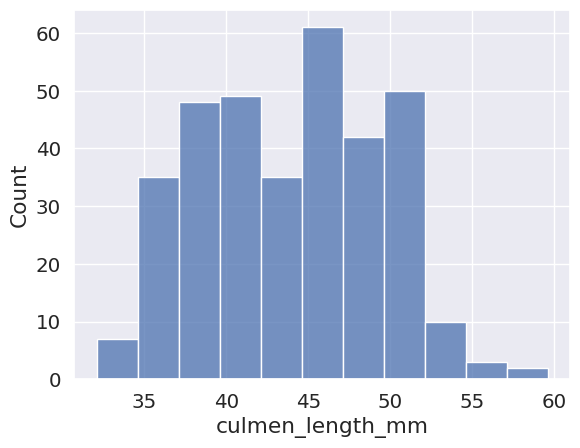

In [7]:
sns.histplot(x='culmen_length_mm', data=pen);

<Axes: xlabel='culmen_length_mm', ylabel='island'>

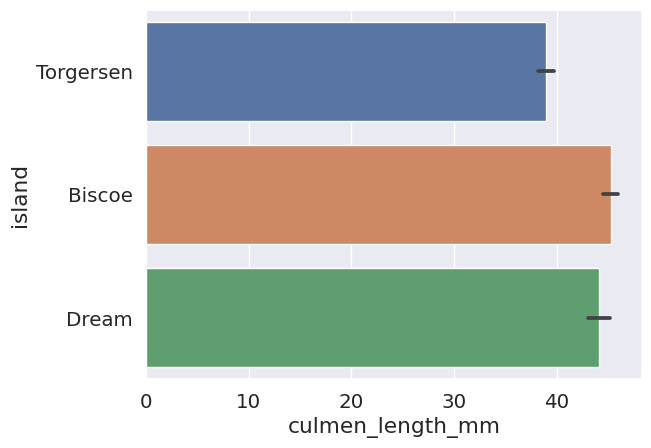

In [8]:
sns.barplot(x='culmen_length_mm',y='island',data=pen) 

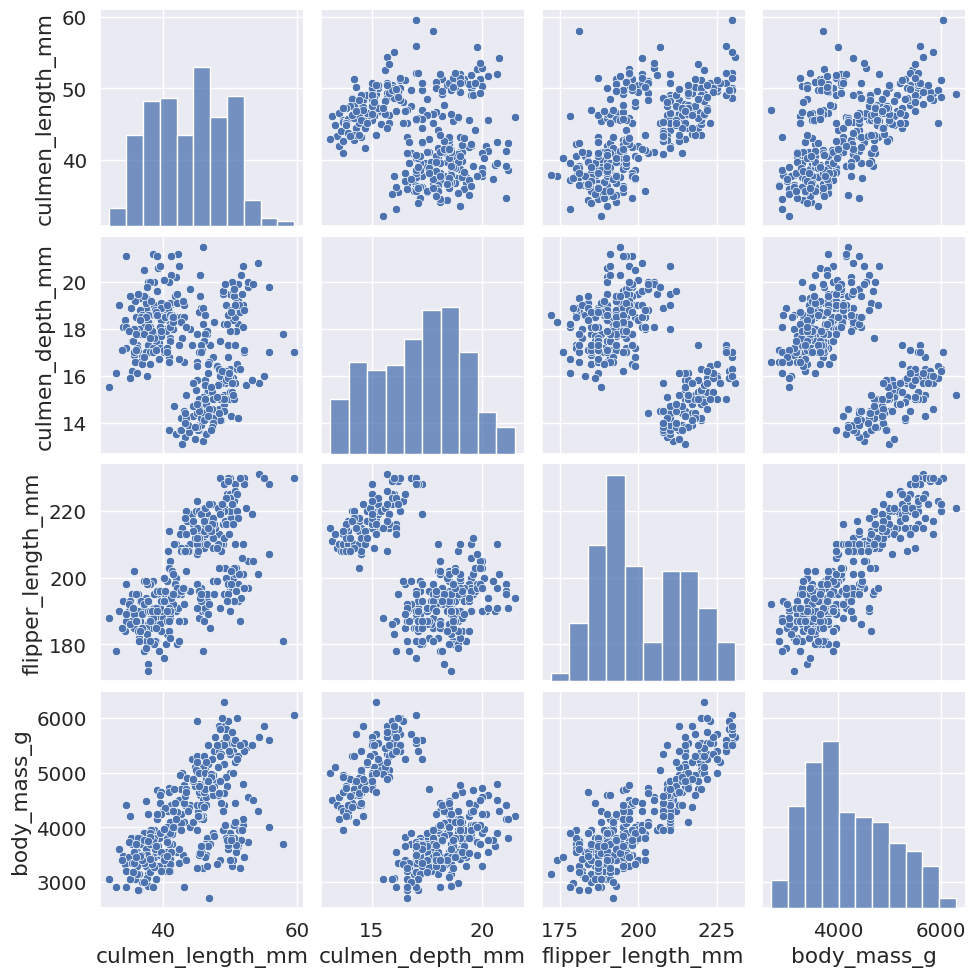

In [9]:
sns.pairplot(pen);

In [11]:
mean = pen['culmen_depth_mm'].mean()
print(mean)

17.151169590643278


In [12]:
mean = pen['culmen_depth_mm'].median()
print(mean)

17.3


In [13]:
mean = pen['culmen_depth_mm'].mode()
print(mean)

0    17.0
Name: culmen_depth_mm, dtype: float64


In [15]:
pen.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [24]:
data=pen.notnull()
data.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,True,True,True,True,True,True,False
340,True,True,True,True,True,True,True
341,True,True,True,True,True,True,True
342,True,True,True,True,True,True,True
343,True,True,True,True,True,True,True


In [21]:
missing_data=pen.isna().sum()
print(missing_data)

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64


In [23]:
pen.fillna(pen.mean(), inplace=True)

<ipython-input-23-9bde84ab5f64>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pen.fillna(pen.mean(), inplace=True)


Outliers Identification:


1.Visualization
2.Skewness
3.Interquartile Range
4.Standard Deviation



<Axes: >

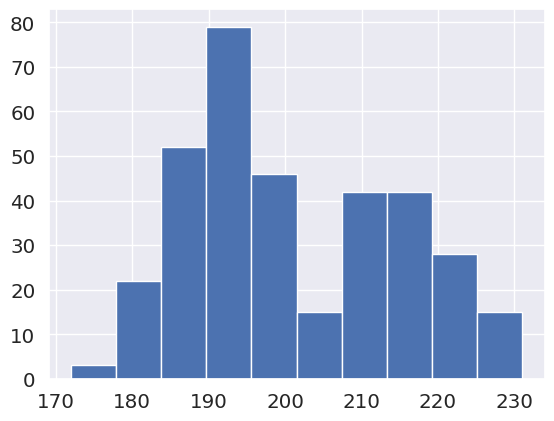

In [27]:
pen['flipper_length_mm'].hist()

In [28]:
print('skewness value of area	: ',pen['flipper_length_mm'].skew())

skewness value of area	:  0.34668222408256033


In [29]:
Q1=pen['flipper_length_mm'].quantile(0.25)
Q3=pen['flipper_length_mm'].quantile(0.75)
IQR=Q3-Q1
IQR

23.0

In [34]:
fare_mean = pen['body_mass_g'].mean()
fare_std =pen['body_mass_g'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers =pen[(pen['body_mass_g'] < low) | (pen['body_mass_g'] > high)]
fare_outliers.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


<Axes: >

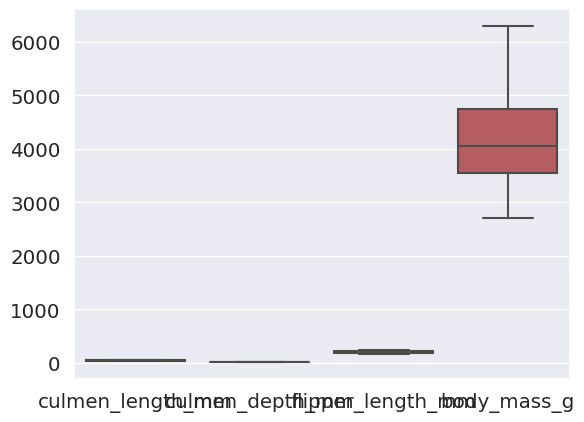

In [35]:
sns.boxplot(data=pen)

In [36]:
df_categorical=pen[['species'	,'island'	,'culmen_length_mm','body_mass_g','sex']]

df_categorical.head()

,species,island,culmen_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,4201.754386,NaN
4,Adelie,Torgersen,36.70000,3450.000000,FEMALE


In [37]:
print(pen['sex'].unique())

['MALE' 'FEMALE' nan '.']


In [38]:
from sklearn.preprocessing import LabelEncoder

marry_encoder = LabelEncoder()

In [39]:
marry_encoder.fit(df_categorical['body_mass_g'])

LabelEncoder()

In [41]:
marry_values = marry_encoder.transform(df_categorical['body_mass_g'])

print("After Encoding:", marry_values[-10:])

After Encoding: [51 90 68 92 70 46 67 88 77 81]


**There are several methods for scaling data Using Log Transformation**

In [43]:

from sklearn.preprocessing import MinMaxScaler

 

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column data
pen['body_mass_g'] = scaler.fit_transform(pen[['body_mass_g']])

print(pen['body_mass_g'])


0      0.291667
1      0.305556
2      0.152778
3      0.417154
4      0.208333
         ...   
339    0.417154
340    0.597222
341    0.847222
342    0.694444
343    0.750000
Name: body_mass_g, Length: 344, dtype: float64


**Perform any of the clustering algorithms**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


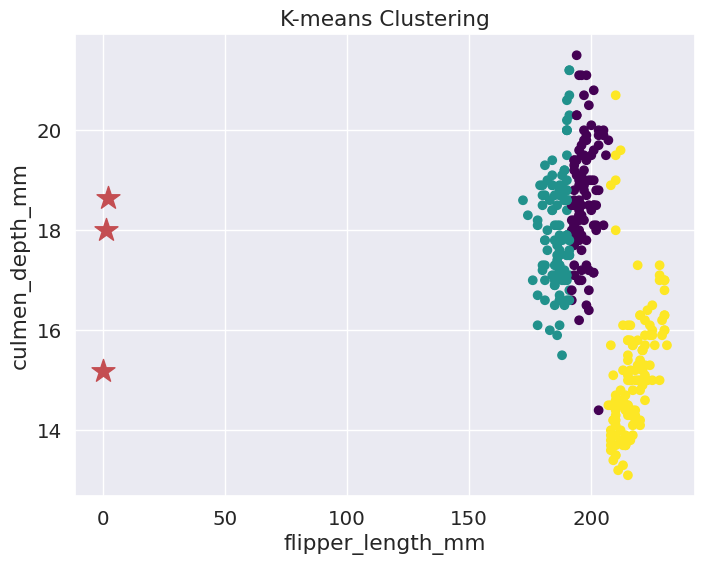

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

 

# Create a KMeans object with k=3 clusters
kmeans = KMeans(n_clusters=3)

p=pen.iloc[:, -5:-2].values

# Fit the model to the data
kmeans.fit(p)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
pen['culmen_length_mm'] = labels

# Visualize the clusters
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(pen['flipper_length_mm'], pen['culmen_depth_mm'], c=pen['culmen_length_mm'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.xlabel('flipper_length_mm')
plt.ylabel('culmen_depth_mm')
plt.title('K-means Clustering')
plt.show()


**Add the cluster data with the primary**

In [58]:
import pandas as pd
from sklearn.cluster import KMeans
 

# Create a KMeans object with k=3 clusters
kmeans = KMeans(n_clusters=3)

p=pen.iloc[:, -5:-2]
print(p)

# Fit the model to the data
kmeans.fit(p)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
p['flipper_length_mm'] = p['flipper_length_mm'].apply(np.int64)

p['flipper_length_mm'] = labels

# Save the updated DataFrame to a new csv file
p.to_csv('mydata_with_clusters.csv', index=False)


     culmen_length_mm  culmen_depth_mm  flipper_length_mm
0                   1         18.70000                  0
1                   1         17.40000                  2
2                   0         18.00000                  2
3                   0         17.15117                  2
4                   0         19.30000                  0
..                ...              ...                ...
339                 0         17.15117                  2
340                 2         14.30000                  1
341                 2         15.70000                  1
342                 2         14.80000                  1
343                 2         16.10000                  1

[344 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Split the data into dependent and independent variables.**

In [59]:
X = pen.drop('flipper_length_mm', axis=1)  # Independent variables
Y =pen['flipper_length_mm']  # Dependent variable

X

Y

0      0
1      2
2      2
3      2
4      0
      ..
339    2
340    1
341    1
342    1
343    1
Name: flipper_length_mm, Length: 344, dtype: int32

**Split the data into training and testing**

In [69]:
from sklearn.model_selection import train_test_split


# Split the data into independent and dependent variables
X = pen.drop('flipper_length_mm', axis=1)  # Independent variables
Y =pen['flipper_length_mm']  # Dependent variable

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train

,species,island,culmen_length_mm,culmen_depth_mm,body_mass_g,sex
66,Adelie,Biscoe,0,16.2,0.180556,FEMALE
229,Gentoo,Biscoe,2,15.4,0.680556,MALE
7,Adelie,Torgersen,0,19.6,0.548611,MALE
140,Adelie,Dream,0,17.1,0.194444,FEMALE
323,Gentoo,Biscoe,2,15.0,0.777778,MALE
...,...,...,...,...,...,...
188,Chinstrap,Dream,0,18.3,0.319444,FEMALE
71,Adelie,Torgersen,1,18.4,0.333333,MALE
106,Adelie,Biscoe,0,17.2,0.291667,FEMALE
270,Gentoo,Biscoe,2,14.2,0.597222,FEMALE


**Build the Model**

In [86]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load data from a csv file
df = pd.read_csv('/content/drive/MyDrive/Data/penguins_size.csv')
 
# Split the data into independent and dependent variables
X = (df.iloc[:, -5:-3].fillna(20.0)).values
Y = (df.iloc[:,-3].fillna(15.0)).values



# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build a linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)


LinearRegression()

**Tain the Model**

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import pandas as pd

# Load data from a csv file
df = pd.read_csv('/content/drive/MyDrive/Data/penguins_size.csv')
 
# Split the data into independent and dependent variables
X = (df.iloc[:, -5:-3].fillna(20.0)).values
Y = (df.iloc[:,-3].fillna(15.0)).values

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build a random forest regression model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor()

**Test the model**

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build a linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

Mean squared error:  337.47771572337524


**Measure the performance using Evaluation Metrics**

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
 

 

 

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build a linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', mse)
print('Root mean squared error: ', rmse)
print('Mean absolute error: ', mae)
print('R-squared: ', r2)

Mean squared error:  337.47771572337524
Root mean squared error:  18.370566559672984
Mean absolute error:  9.428535493384409
R-squared:  0.4852173391382918
